# [PADPy] Praca domowa nr 4 -- raport

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

FM = pd.read_csv("FM.csv", index_col=0).T
AM = pd.read_csv("AM.csv", index_col=0).T
AR = pd.read_csv("AR.csv", index_col=0).T

FM_std = pd.read_csv("FM_std.csv", index_col=0).T
AM_std = pd.read_csv("AM_std.csv", index_col=0).T
AR_std = pd.read_csv("AR_std.csv", index_col=0).T

# Wstęp

Ze względu na problemy techniczne i brak czasu pominąłem analizę zmian parametrów dostępnych w poszczególnych algorytmach. Autorski algorytm `Spectral Clustering`, jak i jego implementacja z modułu `sklearn` zostały uruchomione z liczbą najbliższych sąsiadów równą 8.

W tym zwięzłym raporcie skupiłem się na ogólnej analizie skuteczności algorytmów na danych wzorach poprzez badanie wartości indeksów Fowlkesa-Mallowsa, AM oraz skorygowanego indeksu Randa. Dodatkowo przeanalizowałem wpływ standaryzacji zmiennych w kolumnach na skuteczność działania algorytmów.

# Wyniki w podziale na zbiór i algorytm

## Indeks Fowlkesa–Mallowsa

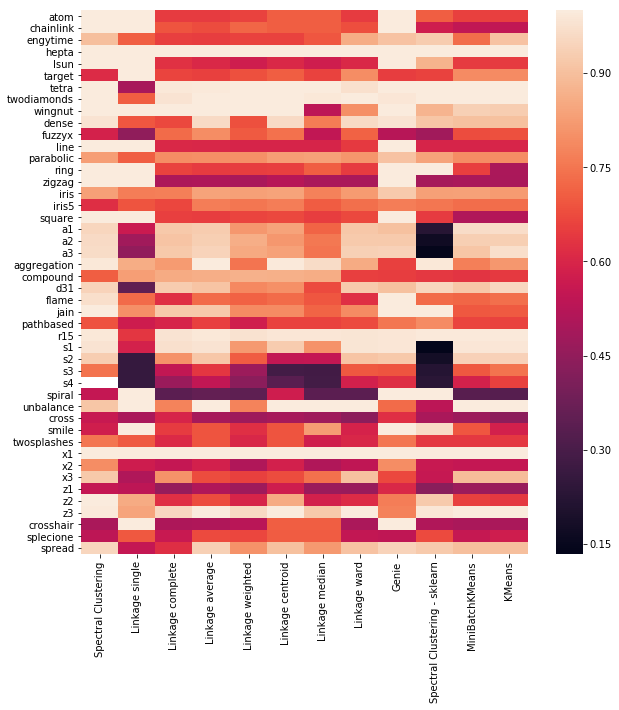

In [2]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=FM)
plt.show()

## Indeks AM

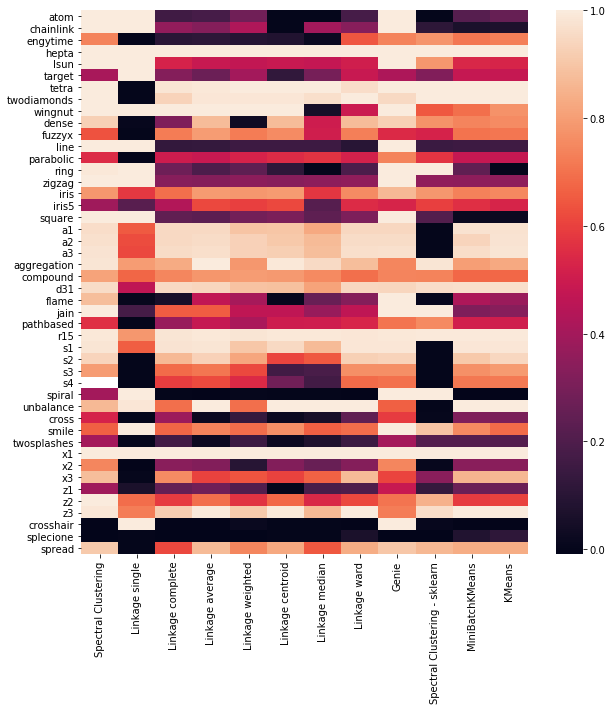

In [3]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=AM)
plt.show()

## Skorygowany indeks Randa

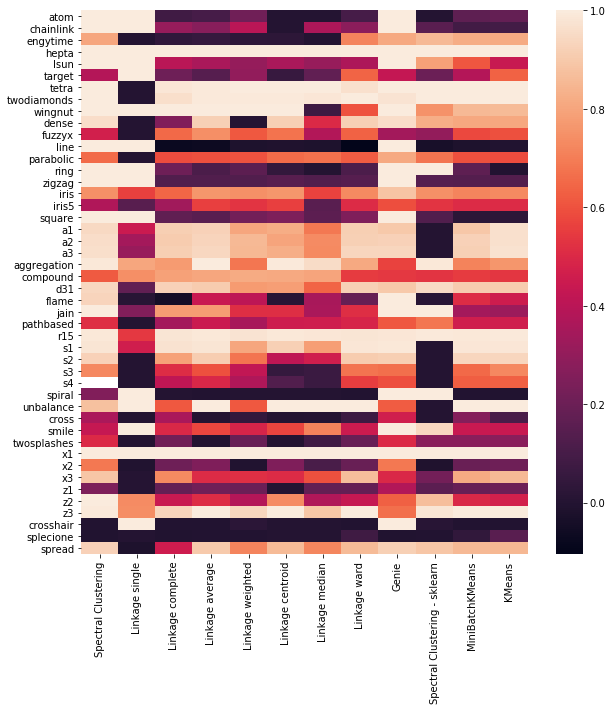

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=AR)
plt.show()

## Interpretacja

Pierwsze co narzuca się po spojrzeniu na trzy powyższe mapy ciepła, to fakt, że indeks Fowlkesa-Mallowsa jest najbardziej wybaczającym z całej trójki, ponieważ daje on najwyższe noty.

Drugą rzeczą w kolejności mogą być kategorie zbiorów. Do zbiorów „prostych”, czyli takich, gdzie każdy algorytm działa dość dobrze możemy zaliczyć zbiory: `hepta`, `tetra`, `twodiamonds`, `r15` i `z3`.

Ponadto patrząc na słupki odpowiadające danym metodom widzimy, że w kolumnach metod `Linkage signle` oraz `Spectral Clustering - sklearn` widnieje więcej ciemnych kolorów, a więc wyniki są gorsze niż pozostałych algorytmów.

# Analiza średnich wyników algorytmów

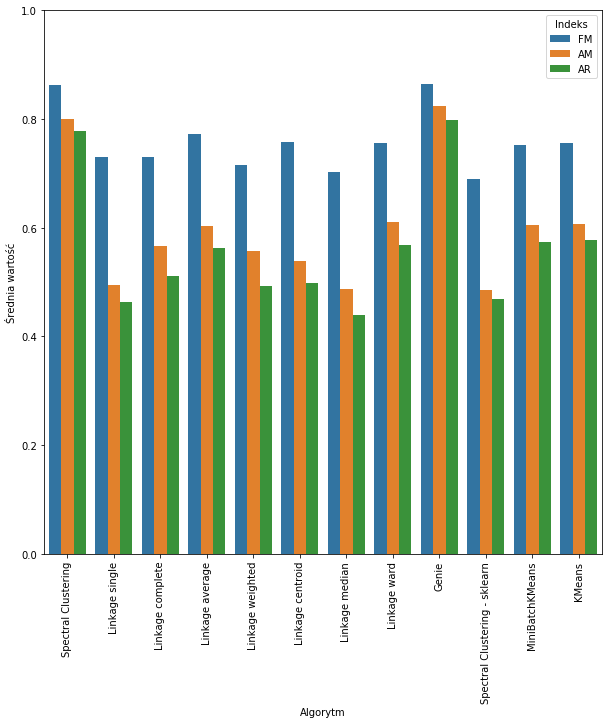

In [5]:
srednie_metody = FM.mean().rename("FM").to_frame()
srednie_metody["AM"] = AM.mean()
srednie_metody["AR"] = AR.mean()

plt.figure(figsize=(10, 10))
sns.barplot(
    x="Algorytm",
    y="Średnia wartość",
    hue="Indeks",
    data=(
        srednie_metody
        .reset_index().melt(id_vars="index")
        .rename(columns={"index": "Algorytm", "variable": "Indeks", "value": "Średnia wartość"}))
).set(
    ylim=(0,1)
)
plt.xticks(rotation=90)
plt.show()

Powyższy wykres obrazuje nam średnie skuteczności metody. Momentalnie rzucają się w oczy dwie wiodące metody, to jest `Genie` oraz `Spectral Clustering` z dość dużą przewagą. Poza tymi dwoma implementacjami pozostałe algorytmy mają dość zbliżoną do siebie skuteczność.

# Wpływ standaryzacji zmiennych na wyniki

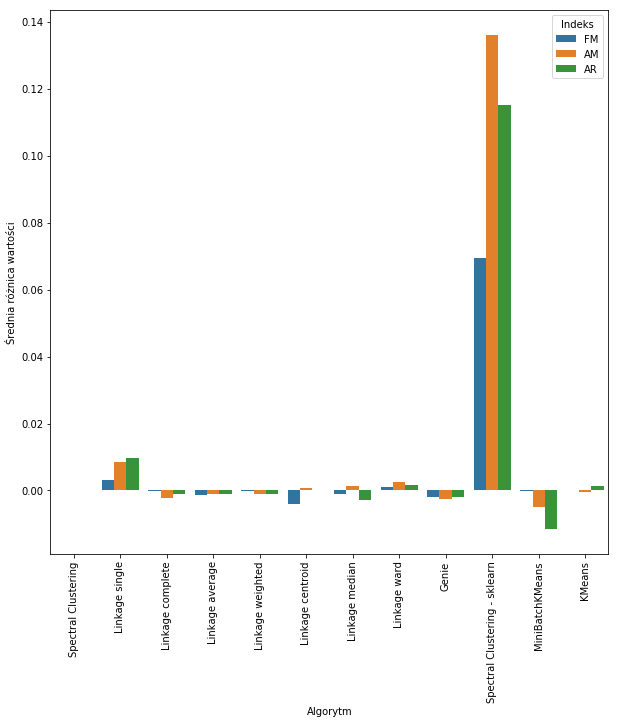

In [6]:
roznice = (FM_std-FM).mean().rename("FM").to_frame()
roznice["AM"] = (AM_std-AM).mean()
roznice["AR"] = (AR_std-AR).mean()

plt.figure(figsize=(10, 10))
sns.barplot(
    x="Algorytm",
    y="Średnia różnica wartości",
    hue="Indeks",
    data=(
        roznice
        .reset_index().melt(id_vars="index")
        .rename(columns={"index": "Algorytm", "variable": "Indeks", "value": "Średnia różnica wartości"}))
)#.set(
#     ylim=(0,1)
# )
plt.xticks(rotation=90)
plt.show()

Ostatni wykres pokazuje nam, że tylko jeden z algorytmów wiele zyskuje na standaryzowaniu danych wejściowych -- jest to `Spectral Clustering` w wydaniu z modułu `sklearn`. W przypadku pozostałych algorytmów zysk ten jest niewielki albo wręcz skuteczność maleje według miary wybranych indeksów.

# Metoda uspójniania grafu pośredniego $G$

Zaimplementowałem dwie różne wersje uspójniania grafu sąsiedztwa `G`. Jedna z nich „wiąże” dwie kolejne składowe końcami, czyli wierzchołek o największym indeksie i wierzchołek o najmniejszym indeksie. Druga zaś, przyjmuje dodatkowo macierz odległości pomiędzy wierzchołkami i do połączenia dwóch składowych wykorzystuje najkrótszą krawędź.

Jednakże w trakcie testów (w pliku `testy.ipynb`) nie napotkałem żadnych różnic w wyniku działania algorytmu, więc w raporcie zamieszczam tylko tę informację.

# Podsumowanie

Algorytm spektralny analizy skupień *(Spectral Clustering)* okazał się być dość dobrym algorytmem. Znajduje się na podium, jeśli chodzi o średnie wartości indeksów. Dodatkowo moja implementacja ma lepsze osiągi według indeksów niż ta, którą można znaleźć w module `sklearn` -- chociaż mój algorytm jest widocznie wolniejszy.

Badany wpływ parmetru $M$ -- liczby najbliższych sąsiadów -- można znaleźć w pliku `testy.ipynb`. Widzimy, że większy parametr nie wiąże się z zapewnieniem większej skuteczności, a czasami manipulacje tą wartością nie mają wpływu na wynik algorytmu. Z moich obserwacji wynika, że algorytm najlepiej działa dla rozsądnych liczb najbliższych sąsiadów, to jest około 15.